In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('repay_loans.csv')

In [ ]:
data.head()

,client_id,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate
0,46109,home,13672.0,0,10243,2002-04-16,2003-12-20,2.15
1,46109,credit,9794.0,0,10984,2003-10-21,2005-07-17,1.25
2,46109,home,12734.0,1,10990,2006-02-01,2007-07-05,0.68
3,46109,cash,12518.0,1,10596,2010-12-08,2013-05-05,1.24
4,46109,credit,14049.0,1,11415,2010-07-07,2012-05-21,3.13


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 443 entries, 0 to 442
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   client_id    443 non-null    int64  
 1   loan_type    443 non-null    object 
 2   loan_amount  440 non-null    float64
 3   repaid       443 non-null    int64  
 4   loan_id      443 non-null    int64  
 5   loan_start   443 non-null    object 
 6   loan_end     443 non-null    object 
 7   rate         438 non-null    float64
dtypes: float64(2), int64(3), object(3)
memory usage: 27.8+ KB


In [ ]:
data.isna().sum()

client_id      0
loan_type      0
loan_amount    3
repaid         0
loan_id        0
loan_start     0
loan_end       0
rate           5
dtype: int64

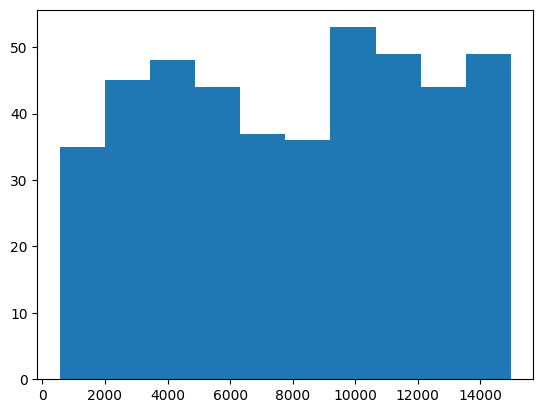

In [ ]:
plt.hist(data['loan_amount'])
plt.show()

In [ ]:
#normal distribution

In [ ]:
data['loan_amount'] = data['loan_amount'].fillna(data['loan_amount'].mean())

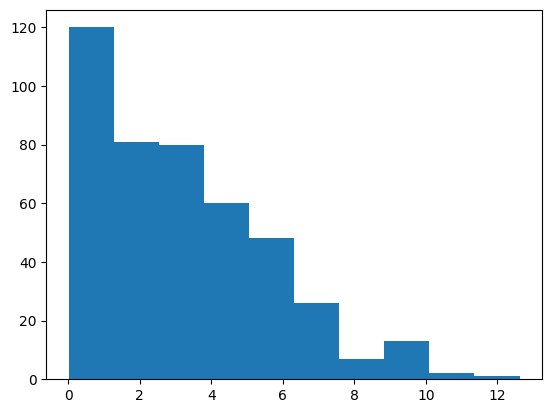

In [ ]:
plt.hist(data['rate'])
plt.show()

In [ ]:
data['rate'] = data['rate'].fillna(data['rate'].median())

In [ ]:
data.isna().sum()

client_id      0
loan_type      0
loan_amount    0
repaid         0
loan_id        0
loan_start     0
loan_end       0
rate           0
dtype: int64

In [ ]:
data.dtypes

client_id        int64
loan_type       object
loan_amount    float64
repaid           int64
loan_id          int64
loan_start      object
loan_end        object
rate           float64
dtype: object

In [ ]:
data['loan_start'] = pd.to_datetime(data['loan_start'])
data['loan_end'] = pd.to_datetime(data['loan_end'])


In [ ]:
data.dtypes

client_id               int64
loan_type              object
loan_amount           float64
repaid                  int64
loan_id                 int64
loan_start     datetime64[ns]
loan_end       datetime64[ns]
rate                  float64
dtype: object

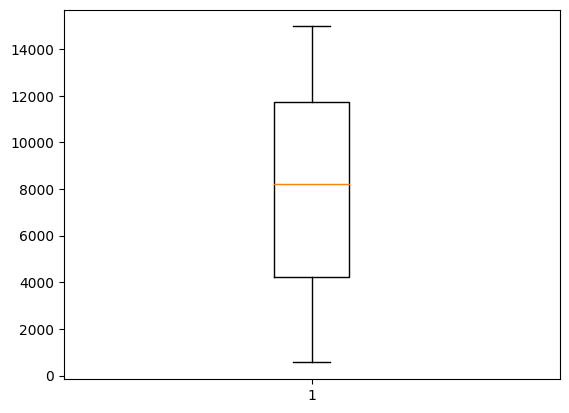

In [ ]:
plt.boxplot(data['loan_amount'])
plt.show()

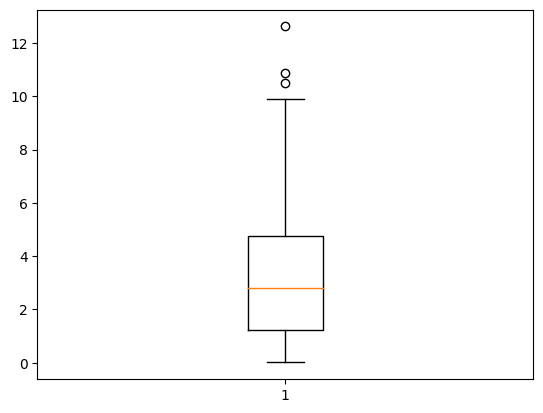

In [ ]:
plt.boxplot(data['rate'])
plt.show()


In [ ]:
#outliers handling
Q1 = data['rate'].quantile(0.25)
Q2 = data['rate'].quantile(0.5)
Q3 = data['rate'].quantile(0.75)

In [ ]:
IQR = Q3 - Q1

In [ ]:
low = Q1 - (1.5 *IQR)
up = Q3 + (1.5*IQR)

In [ ]:
print(low,up)

-4.075 10.045


In [ ]:
data[(data['rate']<low) | (data['rate']>up)].index

Int64Index([41, 195, 421], dtype='int64')

In [ ]:
data.drop([41,195,421],inplace = True)
#also can use this code
# data = data.drop([41,195,421])

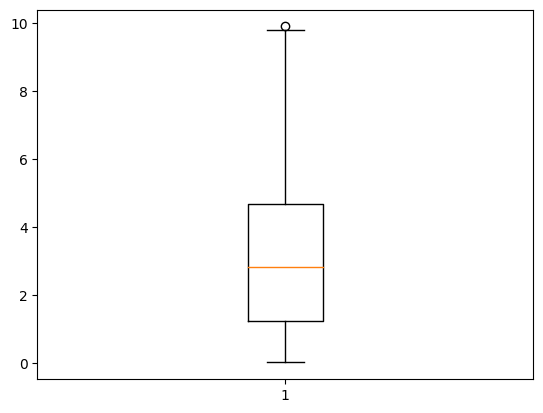

In [ ]:
plt.boxplot(data['rate'])
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc = StandardScaler()

In [ ]:
#feature engineering
data['tenure_loan'] = data['loan_end'] - data['loan_start']

In [ ]:
data.head()

,client_id,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate,tenure_loan
0,46109,home,13672.0,0,10243,2002-04-16,2003-12-20,2.15,613 days
1,46109,credit,9794.0,0,10984,2003-10-21,2005-07-17,1.25,635 days
2,46109,home,12734.0,1,10990,2006-02-01,2007-07-05,0.68,519 days
3,46109,cash,12518.0,1,10596,2010-12-08,2013-05-05,1.24,879 days
4,46109,credit,14049.0,1,11415,2010-07-07,2012-05-21,3.13,684 days


In [ ]:
req_columns = ['loan_type','loan_amount','rate','tenure_loan']

In [ ]:
x = data[req_columns]
y = data['repaid']

In [ ]:
x.loc[:,['loan_amount','rate']] = sc.fit_transform(x[['loan_amount','rate']])

<ipython-input-34-027d907cce76>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x.loc[:,['loan_amount','rate']] = sc.fit_transform(x[['loan_amount','rate']])


In [ ]:
x.head()

,loan_type,loan_amount,rate,tenure_loan
0,home,1.359924,-0.439164,613 days
1,credit,0.430972,-0.829580,635 days
2,home,1.135231,-1.076843,519 days
3,cash,1.083490,-0.833918,879 days
4,credit,1.450232,-0.014044,684 days


In [ ]:
x = pd.get_dummies(x)

NameError: ignored